In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the data
data = pd.read_excel('/content/drive/MyDrive/Customer Feedback/FinalDataset.xlsx')

FileNotFoundError: ignored

In [ ]:
#data = pd.read_excel('FinalDataset.xlsx')
data.head()

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Feedback,Sentiments
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Classy product,1
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Brilliant,1
2,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Really Nice,1
3,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Worth the money,1
4,4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Worth the money,1


In [ ]:
data.shape

(541909, 12)

In [ ]:
# Checking for null values.
info = pd.DataFrame(data=data.isnull().sum()).T.rename(index={0:'Null values'})
info = info.append(pd.DataFrame(data=data.isnull().sum()/data.shape[0] * 100).T.rename(index={0:'% Null values'}))
info

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Feedback,Sentiments
Null values,0.0,0.0,0.0,0.0,1454.000000,0.0,0.0,0.0,135080.000000,0.0,0.0,0.0
% Null values,0.0,0.0,0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0,0.0,0.0


In [ ]:
  # Removing null values
data.dropna(axis=0, subset = ['CustomerID'], inplace=True)
info = pd.DataFrame(data=data.isnull().sum()).T.rename(index={0:'Null values'})
info = info.append(pd.DataFrame(data=data.isnull().sum()/data.shape[0] * 100).T.rename(index={0:'% Null values'}))
info

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Feedback,Sentiments
Null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% Null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Checking for Duplicates :
data.duplicated().sum()

0

In [ ]:
# Removing duplicate entries :
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
x = tuple(data.groupby(['Country']).groups.keys())
y = data.groupby(['Country'])['CustomerID'].count()

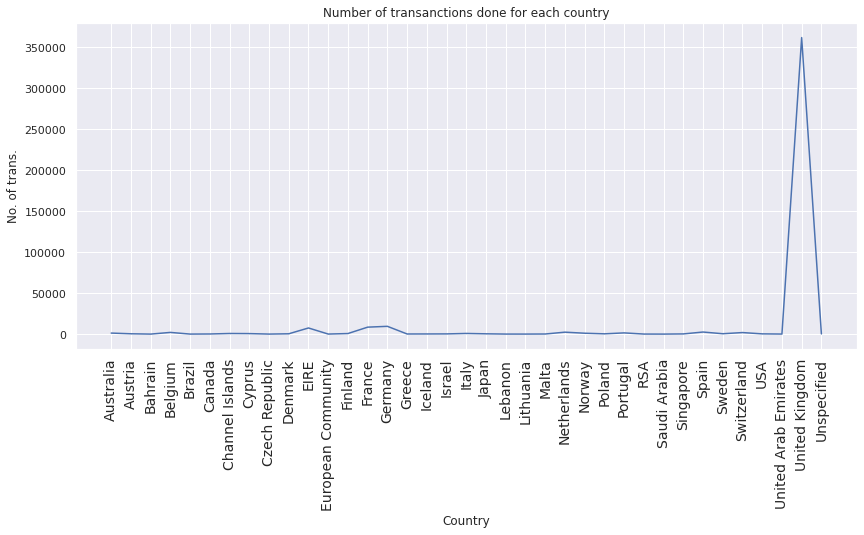

In [ ]:
#EDA
plt.figure(figsize=(14,6))

plt.plot(x, y)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Number of transanctions done for each country")
plt.ylabel("No. of trans.")
plt.xlabel("Country")
plt.show()

In [ ]:
info = pd.DataFrame(data = data.groupby(['Country'])['InvoiceNo'].nunique(), index=data.groupby(['Country']).groups.keys()).T
info

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
InvoiceNo,69,19,2,119,1,6,33,20,5,21,...,1,2,10,105,46,71,7,3,19857,8


In [ ]:
# StockCode Feature ->
# We will see how many different products were sold in the year data was collected.
print(len(data['StockCode'].value_counts()))

3684


In [ ]:
# Transanction feature
# We will see how many different transanctions were done.
print(len(data['InvoiceNo'].value_counts()))

22190


In [ ]:
print(len(data['CustomerID'].value_counts()))

4372


In [ ]:
pd.DataFrame({'products':len(data['StockCode'].value_counts()),
              'transanctions':len(data['InvoiceNo'].value_counts()),
              'Customers':len(data['CustomerID'].value_counts())},
             index = ['Quantity'])

,products,transanctions,Customers
Quantity,3684,22190,4372


There are 22k transanctions but only 4k customers with 3.5k products. It seems that some orders were placed then cancelled or the customers bought items multiple times or multiple items were bought in a single transanction.

In [ ]:
#Checking the number of items bought in a single transanctions
df = data.groupby(['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
df = df.rename(columns = {'InvoiceDate':'Number of products'})
df[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


There are customers who purchase only 1 item per transanction and others who purchase many items per transanction. Also there are some orders which were cancelled they are marked with 'C' in the beginning.

In [ ]:
df['orders cancelled'] = df['InvoiceNo'].apply(lambda x: int('C' in str(x)))
df.head()

,CustomerID,InvoiceNo,Number of products,orders cancelled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0


In [ ]:
# Counting number of cancelled transanctions
print("Number of orders cancelled {}/{} ({:.2f}%)".format(df['orders cancelled'].sum(), df.shape[0], df['orders cancelled'].sum()/ df.shape[0] * 100))

Number of orders cancelled 3654/22190 (16.47%)


In [ ]:
# Checking discounted items
df = data[data['Description'] == 'Discount']
df.head()

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Feedback,Sentiments
141,141,141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Nice,1
9038,9038,9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom,Great product,1
14498,14498,14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom,Avg. Product. Max worth â‚¹(1.5-1.6)k,1
19392,19392,19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,Excellent,1
31134,31134,31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,Delightful,1


In [ ]:
#Checking whether every order that has been cancelled has a counterpart
df = data[(data['Quantity']<0) & (data['Description']!='Discount')][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
df.head()

,CustomerID,Quantity,StockCode,Description,UnitPrice
154,15311.0,-1,35004C,SET OF 3 COLOURED FLYING DUCKS,4.65
235,17548.0,-12,22556,PLASTERS IN TIN CIRCUS PARADE,1.65
236,17548.0,-24,21984,PACK OF 12 PINK PAISLEY TISSUES,0.29
237,17548.0,-24,21983,PACK OF 12 BLUE PAISLEY TISSUES,0.29
238,17548.0,-24,21980,PACK OF 12 RED RETROSPOT TISSUES,0.29


In [ ]:
for index, col in df.iterrows():
    if data[(data['CustomerID'] == col[0]) & (data['Quantity'] == -col[1]) & (data['Description'] == col[2])].shape[0] == 0:
        print(index, df.loc[index])
        print("There are some transanctions for which counterpart does not exist")
        break

154 CustomerID                             15311.0
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
There are some transanctions for which counterpart does not exist


We found out that there are some orders for which counterpart do not exist.
Reasons could be because some orders were made before the date the dataset is given from or that some orders were cancelled with exactly same counterpart or some are just errors maybe.

In [ ]:
#Removing cancelled orders
df_cleaned = data.copy(deep=True)
df_cleaned['QuatityCancelled'] = 0
entry_to_remove = []; doubtfull_entry = []

for index, col in data.iterrows():
    if(col['Quantity'] > 0)or(col['Description']=='Discount'):continue
    df_test = data[(data['CustomerID']==col['CustomerID'])&(data['StockCode']==col['StockCode'])&
                   (data['InvoiceDate']<col['InvoiceDate'])&(data['Quantity']>0)].copy()

    # Order cancelled without counterpart, these are doubtful as they maybe errors or maybe orders were placed before data given
    if(df_test.shape[0] == 0):
        doubtfull_entry.append(index)

    # Cancellation with single counterpart
    elif(df_test.shape[0] == 1):
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCancelled'] = -col['Quantity']
        entry_to_remove.append(index)

    # Various counterpart exists for orders
    elif(df_test.shape[0] > 1):
        df_test.sort_index(axis = 0, ascending=False, inplace=True)
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']:continue
            df_cleaned.loc[ind, 'QuantityCancelled'] = -col['Quantity']
            entry_to_remove.append(index)
            break

In [ ]:
print("Entry to remove {}".format(len(entry_to_remove)))
print("Doubtfull Entry {}".format(len(doubtfull_entry)))

Entry to remove 7543
Doubtfull Entry 1229


In [ ]:
# Deleting these entries :
df_cleaned.drop(entry_to_remove, axis=0, inplace=True)
df_cleaned.drop(doubtfull_entry, axis=0, inplace=True)

In [ ]:
df_cleaned['QuantityCancelled'] = np.nan_to_num(df_cleaned['QuantityCancelled'])
df_cleaned.head()

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Feedback,Sentiments,QuatityCancelled,QuantityCancelled
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Classy product,1,0,0.0
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Brilliant,1,0,0.0
2,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Really Nice,1,0,0.0
3,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Worth the money,1,0,0.0
4,4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Worth the money,1,0,0.0


In [ ]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCancelled'])
df_cleaned.sort_values('CustomerID')[:5]

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Feedback,Sentiments,QuatityCancelled,QuantityCancelled,TotalPrice
61619,61619,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,Must buy!,0,0,74215.0,0.00
14945,14945,14945,537626,22774,RED DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,Does the job,0,0,0.0,15.00
428987,428987,428987,573511,23422,PANTRY HOOK BALLOON WHISK,12,2011-10-31 12:25:00,2.08,12347.0,Iceland,Brilliant,1,0,0.0,24.96
428988,428988,428988,573511,23420,PANTRY HOOK TEA STRAINER,12,2011-10-31 12:25:00,2.08,12347.0,Iceland,Impressive,1,0,0.0,24.96
428989,428989,428989,573511,22699,ROSES REGENCY TEACUP AND SAUCER,18,2011-10-31 12:25:00,2.95,12347.0,Iceland,Brilliant,1,0,0.0,53.10


Now we sum the individual orders and group them on the basis of invoice number to remove the problem of duplicate rows for same order

In [ ]:
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice': 'Basket Price'})

df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace=True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID')[:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347.0,537626,711.79,2010-12-07 14:57:00.000000000
2,12347.0,542237,475.39,2011-01-26 14:29:59.999999744
3,12347.0,549222,636.25,2011-04-07 10:43:00.000000000
4,12347.0,556201,382.52,2011-06-09 13:01:00.000000000
5,12347.0,562032,584.91,2011-08-02 08:48:00.000000000
6,12347.0,573511,1294.32,2011-10-31 12:25:00.000000000


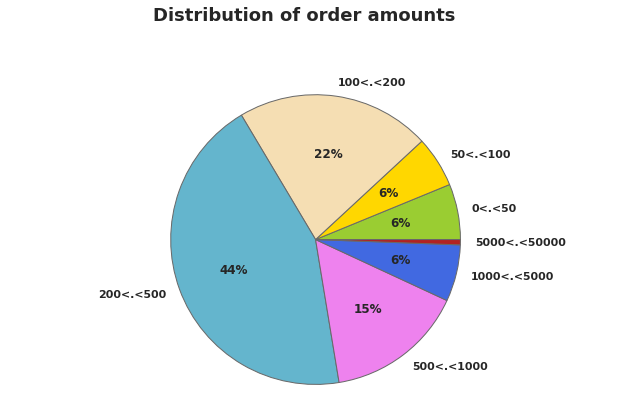

In [ ]:
#Plotting the purchases made
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i,price in enumerate(price_range):
    if i==0:continue
    val = basket_price[(basket_price['Basket Price'] < price)&
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)

plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue', 'firebrick']
labels = ["{}<.<{}".format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels = labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle = 0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha = 'center', fontsize = 18)
plt.show()

In [ ]:
#Analyzing product Description
is_noun = lambda pos:pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    import nltk
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots = dict()
    keywords_select = dict()
    category_keys = []
    count_keywords = dict()
    icount = 0

    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]

        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1


    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)

            category_keys.append(clef)
            keywords_select[s] = clef

        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]

    print("Number of keywords in the variable '{}': {}".format(colonne, len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [ ]:
df_produits = pd.DataFrame(data['Description'].unique()).rename(columns = {0:"Description"})

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

Number of keywords in the variable 'Description': 1483


In [ ]:
# Plotting keywords vs frequency graph :
list_products = []
for k, v in count_keywords.items():
    word = keywords_select[k]
    list_products.append([word, v])

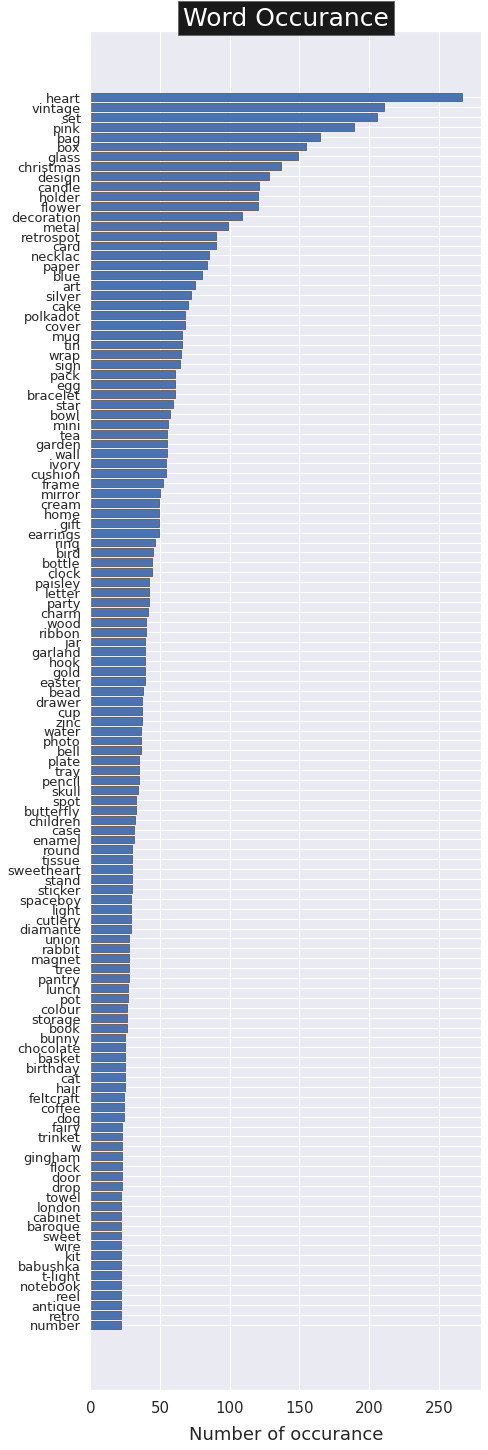

In [ ]:
liste = sorted(list_products, key = lambda x:x[1], reverse=True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.yticks(x_axis, x_label)
plt.xlabel("Number of occurance", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align='center')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Word Occurance", bbox={'facecolor':'k', 'pad':5}, color='w', fontsize = 25)
plt.show()

In [ ]:
# Preserving important words :
list_products = []
for k, v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word)<3 or v<13: continue
    list_products.append([word, v])

list_products.sort(key = lambda x:x[1], reverse=True)
print("Number of preserved words : ", len(list_products))

Number of preserved words :  193


Describing every product in terms of words present in the description :
We will only use the preserved words, this is just like Binary Bag of Words
We need to convert this into a product matrix with products as rows and different words as columns. A cell contains a 1 if a particular product has that word in its description else it contains 0.
We will use this matrix to categorize the products.
We will add a mean price feature so that the groups are balanced.

In [ ]:

threshold = [0, 1, 2, 3, 5, 10]

# Getting the description.
liste_produits = df_cleaned['Description'].unique()

# Creating the product and word matrix.
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), liste_produits))


label_col = []
for i in range(len(threshold)):
    if i == len(threshold) - 1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i], threshold[i+1])

    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_produits):
    prix = df_cleaned[df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0

    while prix > threshold[j]:
        j += 1
        if j == len(threshold):
            break
    X.loc[i, label_col[j-1]] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


In [ ]:
print("{:<8} {:<20} \n".format('range', 'number of products') + 20*'-')
for i in range( len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

range    number of products   
--------------------
0<.<1       964                 
1<.<2       1009                
2<.<3       673                 
3<.<5       608                 
5<.<10      468                 
.>10        156                 


**K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
matrix = X.values

In [ ]:
# Using optimal number of clusters using hyperparameter tuning:
for n_clusters in range(3, 10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    sil_avg = silhouette_score(matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  3 The average silhouette_score is :  0.09685088674992262
For n_clusters :  4 The average silhouette_score is :  0.12684795521743547
For n_clusters :  5 The average silhouette_score is :  0.1267392917749498
For n_clusters :  6 The average silhouette_score is :  0.15184471074917857
For n_clusters :  7 The average silhouette_score is :  0.15819235301909684
For n_clusters :  8 The average silhouette_score is :  0.14834830973312
For n_clusters :  9 The average silhouette_score is :  0.15397403858962747


In [ ]:
# Choosing number of clusters as 5:
# Trying Improving the silhouette_score :
n_clusters = 5
sil_avg = -1
while sil_avg < 0.145:
    kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    sil_avg = silhouette_score(matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  5 The average silhouette_score is :  0.12270277919240519
For n_clusters :  5 The average silhouette_score is :  0.14566477161539423


In [ ]:
# Printing number of elements in each cluster :
pd.Series(clusters).value_counts()

1    1159
0     964
3     673
4     608
2     474
dtype: int64

In [ ]:
#Analyzing the 5 clusters
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    import matplotlib as mpl
    mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhoutte_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhoutte_values.sort()
        size_cluster_i = ith_cluster_silhoutte_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhoutte_values, alpha = 0.8)

        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                 bbox = dict(facecolor = 'white', edgecolor = 'black', boxstyle = 'round, pad = 0.3'))

        y_lower = y_upper + 10

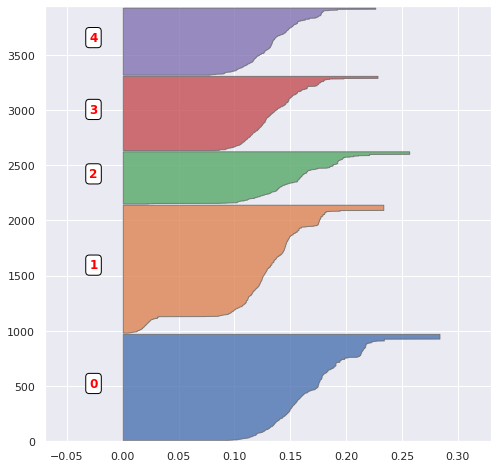

In [ ]:
# Plotting the intra cluster silhouette distances.
from sklearn.metrics import silhouette_samples
sample_silhouette_values = silhouette_samples(matrix, clusters)
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

In [ ]:
#Checking which words are most common in the clusters.
liste = pd.DataFrame(liste_produits)
liste_words = [word for (word, occurance) in list_products]

occurance = [dict() for _ in range(n_clusters)]

# Creating data for printing word cloud.
for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurance[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))



In [ ]:
# Code for printing word cloud.
from random import randint
import random
def random_color_func(word=None, font_size=None, position=None,orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [ ]:
import wordcloud
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4, 2, increment)
    words = dict()
    trunc_occurances = liste[0:150]
    for s in trunc_occurances:
        words[s[0]] = s[1]

    wc = wordcloud.WordCloud(width=1000,height=400, background_color='lightgrey', max_words=1628,relative_scaling=1,
                             color_func = random_color_func, normalize_plurals=False)
    wc.generate_from_frequencies(words)
    ax1.imshow(wc, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster n{}'.format(increment-1))

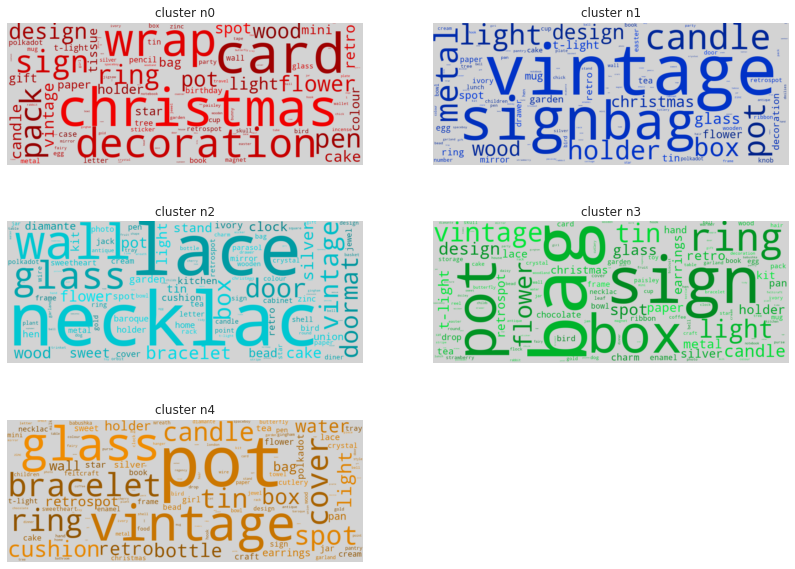

In [ ]:
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurance[i]
    tone = color[i]
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)

**Conclusions**

Cluster number two contains all the items related to decoration and gifts.
Cluster number 4 contains luxury items.
Words like Vintage are common to most of the clusters.

**Dimentionality Reduction**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


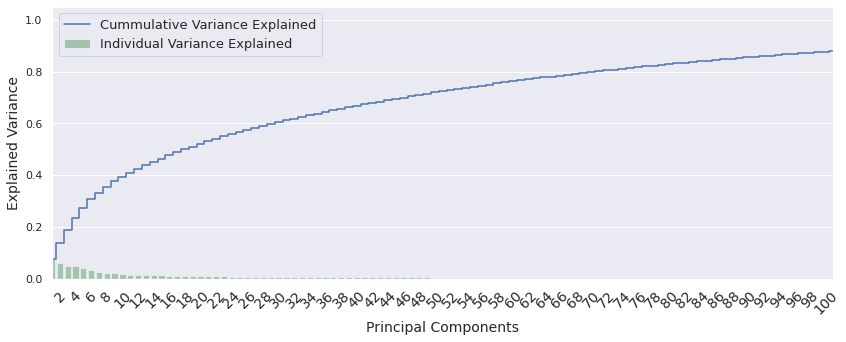

In [ ]:
# Checking the amount of variance explained :
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where = 'mid', label = 'Cummulative Variance Explained')
sns.barplot(np.arange(1, matrix.shape[1] + 1), pca.explained_variance_ratio_, alpha = 0.5, color = 'g',
            label = 'Individual Variance Explained')
plt.xlim(0, 100)
plt.xticks(rotation = 45, fontsize = 14)
ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel("Explained Variance", fontsize = 14)
plt.xlabel("Principal Components", fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 13)
plt.show()

**We need more than 100 Principal Components to explain more than 90 % of the variance.**

Generating Customer Segments/Categories :
We will use the already generated product categories and create a new feature which tells to which category the product belongs to.

In [ ]:
corresp = dict()
for key, val in zip(liste_produits, clusters):
    corresp[key] = val

df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(corresp)
df_cleaned[['InvoiceNo', 'Description', 'categ_product']][:10]

,InvoiceNo,Description,categ_product
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,3
1,536365,WHITE METAL LANTERN,4
2,536365,CREAM CUPID HEARTS COAT HANGER,4
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,4
4,536365,RED WOOLLY HOTTIE WHITE HEART.,4
5,536365,SET 7 BABUSHKA NESTING BOXES,2
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,4
7,536366,HAND WARMER UNION JACK,3
8,536366,HAND WARMER RED POLKA DOT,1
9,536367,ASSORTED COLOUR BIRD ORNAMENT,1


In [ ]:
# Creating 5 new features that will contain the amount in a single transanction on different categories of product.
for i in range(5):
    col = 'categ_{}'.format(i)
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCancelled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)

df_cleaned[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']][:10]

,InvoiceNo,Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,3,0.0,0.00,0.0,15.3,0.00
1,536365,WHITE METAL LANTERN,4,0.0,0.00,0.0,0.0,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,4,0.0,0.00,0.0,0.0,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,4,0.0,0.00,0.0,0.0,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,4,0.0,0.00,0.0,0.0,20.34
5,536365,SET 7 BABUSHKA NESTING BOXES,2,0.0,0.00,15.3,0.0,0.00
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,4,0.0,0.00,0.0,0.0,25.50
7,536366,HAND WARMER UNION JACK,3,0.0,0.00,0.0,11.1,0.00
8,536366,HAND WARMER RED POLKA DOT,1,0.0,11.10,0.0,0.0,0.00
9,536367,ASSORTED COLOUR BIRD ORNAMENT,1,0.0,54.08,0.0,0.0,0.00


In [ ]:
# sum of purchases by user and order.
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index = False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice': 'Basket Price'})


In [ ]:
temp

,CustomerID,InvoiceNo,TotalPrice
0,12346.0,541431,0.00
1,12347.0,537626,711.79
2,12347.0,542237,475.39
3,12347.0,549222,636.25
4,12347.0,556201,382.52
...,...,...,...
18631,18283.0,579673,223.61
18632,18283.0,580872,208.00
18633,18287.0,554065,765.28
18634,18287.0,570715,1001.32


In [ ]:
col = "categ_{}".format(1)
col

'categ_1'

In [ ]:
# percentage spent on each product category
for i in range(5):
    col = "categ_{}".format(i)
    temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index = False)[col].sum()
    basket_price.loc[:'TotalPrice', col] = temp


In [ ]:
# percentage spent on each product category
for i in range(5):
    col = "categ_{}".format(i)
    temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index = False)[col].sum()
    basket_price.loc[:, col] = temp

# Dates of the order.
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index = False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace=True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

# Selecting entries with basket price > 0.
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending=True)[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
1,12347.0,537626,711.79,23.40,187.20,124.44,83.40,293.35,2010-12-07 14:57:00.000000000
2,12347.0,542237,475.39,84.34,168.75,0.00,53.10,169.20,2011-01-26 14:29:59.999999744
3,12347.0,549222,636.25,81.00,369.15,0.00,71.10,115.00,2011-04-07 10:43:00.000000000
4,12347.0,556201,382.52,41.40,74.40,19.90,78.06,168.76,2011-06-09 13:01:00.000000000
5,12347.0,562032,584.91,61.30,147.95,97.80,119.70,158.16,2011-08-02 08:48:00.000000000


In [ ]:
basket_price['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [ ]:
basket_price['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
#Tmme Based Splitting
import datetime

basket_price["InvoiceDate"] = pd.to_datetime(basket_price["InvoiceDate"]).dt.date
set_entrainment = basket_price[basket_price['InvoiceDate'] < datetime.date(2011, 10 , 1)]
set_test = basket_price[basket_price['InvoiceDate'] >= datetime.date(2011, 10, 1)]
basket_price = set_entrainment.copy(deep = True)


In [ ]:
'''
Grouping Orders :
We will get info about every customer on how much do they purchase, total number of orders. etc
'''

transanctions_per_user = basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count', 'min', 'max', 'mean', 'sum'])

for i in range(5):
    col = 'categ_{}'.format(i)
    transanctions_per_user.loc[:, col] = basket_price.groupby(by=['CustomerID'])[col].sum() / transanctions_per_user['sum'] * 100

transanctions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transanctions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347.0,5,382.52,711.79,558.172000,2790.86,10.442659,33.948317,8.676179,14.524555,32.408290
1,12348.0,4,227.44,892.80,449.310000,1797.24,38.016069,61.983931,0.000000,0.000000,0.000000
2,12350.0,1,334.40,334.40,334.400000,334.40,11.692584,60.406699,0.000000,27.900718,0.000000
3,12352.0,6,144.35,840.30,345.663333,2073.98,0.491808,66.125517,14.301006,3.370331,15.711338
4,12353.0,1,89.00,89.00,89.000000,89.00,0.000000,57.752809,22.359551,19.887640,0.000000


In [ ]:
# Generating two new variables - days since first puchase and days since last purchase.
last_date = basket_price['InvoiceDate'].max()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test = first_registration.applymap(lambda x:(last_date - x).days)
test2 = last_purchase.applymap(lambda x:(last_date - x).days)

transanctions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']
transanctions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

In [ ]:
transanctions_per_user[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12347.0,5,382.52,711.79,558.172000,2790.86,10.442659,33.948317,8.676179,14.524555,32.408290,59,297
1,12348.0,4,227.44,892.80,449.310000,1797.24,38.016069,61.983931,0.000000,0.000000,0.000000,5,288
2,12350.0,1,334.40,334.40,334.400000,334.40,11.692584,60.406699,0.000000,27.900718,0.000000,240,240
3,12352.0,6,144.35,840.30,345.663333,2073.98,0.491808,66.125517,14.301006,3.370331,15.711338,2,226
4,12353.0,1,89.00,89.00,89.000000,89.00,0.000000,57.752809,22.359551,19.887640,0.000000,134,134


We need to focus on customers who only placed one order, our objective is to target these customers in a way to retains them.


In [ ]:
n1 = transanctions_per_user[transanctions_per_user['count'] == 1].shape[0]
n2 = transanctions_per_user.shape[0]
print("No. of Customers with single purchase : {:<2}/{:<5} ({:<2.2f}%)".format(n1, n2, n1/n2*100))

No. of Customers with single purchase : 1445/3608  (40.05%)


In [ ]:
list_cols = ['count', 'min', 'max', 'mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
selected_customers = transanctions_per_user.copy(deep=True)
matrix = selected_customers[list_cols].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(matrix)
print("Variable Mean Values: \n" + 90*'-' + '\n', scaler.mean_)
scaled_matrix = scaler.transform(matrix)

Variable Mean Values: 
------------------------------------------------------------------------------------------
 [  3.62 260.63 558.03 378.23  13.96  32.77  15.69  21.2   16.38]


In [ ]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


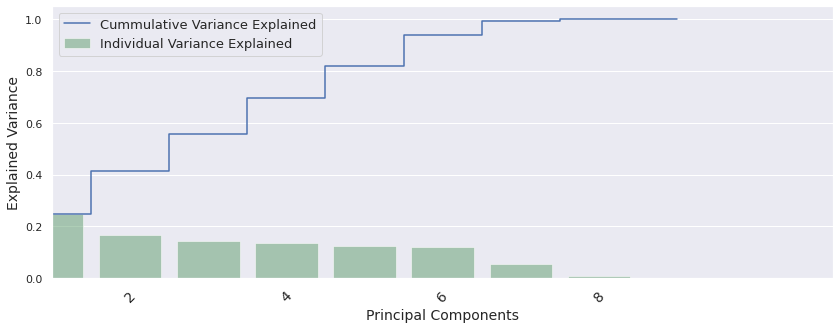

In [ ]:
# Checking the amount of variance explained :
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where = 'mid', label = 'Cummulative Variance Explained')
sns.barplot(np.arange(1, matrix.shape[1] + 1), pca.explained_variance_ratio_, alpha = 0.5, color = 'g',
            label = 'Individual Variance Explained')
plt.xlim(0, 10)
plt.xticks(rotation = 45, fontsize = 14)
ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel("Explained Variance", fontsize = 14)
plt.xlabel("Principal Components", fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 13)
plt.show()

In [ ]:
# Using optimal number of clusters using hyperparameter tuning:
for n_clusters in range(3, 21):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(scaled_matrix)
    clusters = kmeans.predict(scaled_matrix)
    sil_avg = silhouette_score(scaled_matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  3 The average silhouette_score is :  0.14233026486308833
For n_clusters :  4 The average silhouette_score is :  0.15918463160996266
For n_clusters :  5 The average silhouette_score is :  0.1661665419362542
For n_clusters :  6 The average silhouette_score is :  0.1730666080805995
For n_clusters :  7 The average silhouette_score is :  0.18577428166535542
For n_clusters :  8 The average silhouette_score is :  0.1949366228747529
For n_clusters :  9 The average silhouette_score is :  0.204284585261882
For n_clusters :  10 The average silhouette_score is :  0.2102825962824238
For n_clusters :  11 The average silhouette_score is :  0.18683896081167986
For n_clusters :  12 The average silhouette_score is :  0.1990985503448146
For n_clusters :  13 The average silhouette_score is :  0.19202632801966785
For n_clusters :  14 The average silhouette_score is :  0.19252107197630938
For n_clusters :  15 The average silhouette_score is :  0.1956440118330851
For n_clusters :  16 The av

In [ ]:
# Choosing number of clusters as 10:
# Trying Improving the silhouette_score :
n_clusters = 10
sil_avg = -1
while sil_avg < 0.208:
    kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(scaled_matrix)
    clusters = kmeans.predict(scaled_matrix)
    sil_avg = silhouette_score(scaled_matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  10 The average silhouette_score is :  0.21131964863335378


In [ ]:
n_clusters = 10
kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print("Silhouette Score : {:<.3f}".format(silhouette_avg))

Silhouette Score : 0.213


In [ ]:
# Looking at clusters :
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns=['Number of Clients']).T

,2,0,8,3,5,6,1,7,9,4
Number of Clients,1617,506,346,335,296,259,201,25,12,11


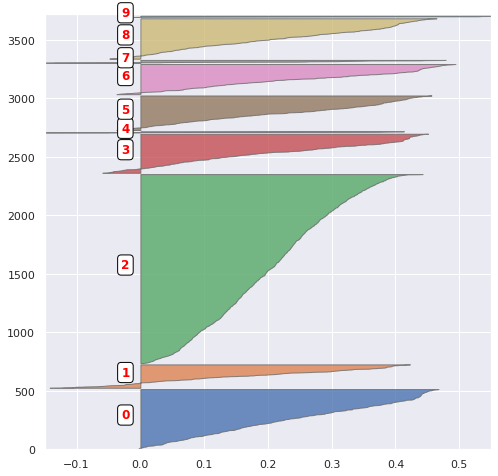

In [ ]:
#There is a large difference in cluster segments, We will analyze these clusters further.

sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)

graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

From this above graph we can rest assured that all the clusters are disjoint

Now we need to learn the habits of the customers to do that we will add the variables that define a cluster to which each customer belong

In [ ]:
selected_customers.loc[:, 'cluster'] = clusters_clients

**Adding Feedback Feature to Selected Customers**

In [ ]:
selected_customers['Feedback'] = data['Sentiments']

In [ ]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])

merged_df.drop('CustomerID', axis = 1, inplace = True)
print('Number of customers : ', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')

Number of customers :  3608


In [ ]:
# Reorganizing the content of the dataframe.
liste_index = []
for i in range(5):
    column = 'categ_{}'.format(i)
    liste_index.append(merged_df[merged_df[column] > 45].index.values[0])

liste_index_reordered = liste_index
liste_index_reordered += [s for s in merged_df.index if s not in liste_index]

merged_df = merged_df.reindex(index = liste_index_reordered)
merged_df = merged_df.reset_index(drop = False)
merged_df.head()

,cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,Feedback,size
0,6.0,2.150579,199.157336,315.471390,249.875371,569.366641,55.289955,22.005525,5.322541,11.206224,6.175755,97.378378,164.447876,0.635838,259
1,0.0,2.454545,201.344743,331.391642,259.256520,697.251089,8.870830,66.367545,7.187870,10.800987,6.775711,109.687747,177.942688,0.677054,506
2,8.0,2.661850,191.478497,317.250520,247.059523,707.197948,5.180375,17.572140,52.541787,11.626042,13.079656,119.384393,190.450867,0.633028,346
3,3.0,3.059701,206.399970,411.027313,299.744831,1042.057313,7.318977,18.340221,7.935928,58.783145,7.621729,100.077612,198.232836,0.686957,335
4,5.0,2.189189,200.878176,356.580439,266.487316,710.992297,6.606511,17.092599,10.923936,14.400935,51.015089,109.334459,171.722973,0.614286,296


In [ ]:
#Saving the selected customer dataframe and above dataframe to csv so that we do not need to do all this again
selected_customers.to_csv("selected_customers.csv")

In [ ]:
merged_df.to_csv("merged_df.csv")

In [ ]:
#Classifying the Customers :
selected_customers = pd.read_csv('selected_customers.csv')
merged_df = pd.read_csv('merged_df.csv')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
class Class_Fit(object):
    def __init__(self, clf, params = None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)

    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)

    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)

    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} %".format(100 * accuracy_score(Y, self.predictions)))

In [ ]:
selected_customers.head()

,Unnamed: 0,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,cluster,Feedback
0,0,12347.0,5,382.52,711.79,558.172000,2790.86,10.442659,33.948317,8.676179,14.524555,32.408290,59,297,2,1.0
1,1,12348.0,4,227.44,892.80,449.310000,1797.24,38.016069,61.983931,0.000000,0.000000,0.000000,5,288,0,1.0
2,2,12350.0,1,334.40,334.40,334.400000,334.40,11.692584,60.406699,0.000000,27.900718,0.000000,240,240,0,1.0
3,3,12352.0,6,144.35,840.30,345.663333,2073.98,0.491808,66.125517,14.301006,3.370331,15.711338,2,226,0,1.0
4,4,12353.0,1,89.00,89.00,89.000000,89.00,0.000000,57.752809,22.359551,19.887640,0.000000,134,134,0,1.0


In [ ]:
selected_customers

,Unnamed: 0,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,cluster,Feedback
0,0,12347.0,5,382.52,711.79,558.172000,2790.86,10.442659,33.948317,8.676179,14.524555,32.408290,59,297,2,1.0
1,1,12348.0,4,227.44,892.80,449.310000,1797.24,38.016069,61.983931,0.000000,0.000000,0.000000,5,288,0,1.0
2,2,12350.0,1,334.40,334.40,334.400000,334.40,11.692584,60.406699,0.000000,27.900718,0.000000,240,240,0,1.0
3,3,12352.0,6,144.35,840.30,345.663333,2073.98,0.491808,66.125517,14.301006,3.370331,15.711338,2,226,0,1.0
4,4,12353.0,1,89.00,89.00,89.000000,89.00,0.000000,57.752809,22.359551,19.887640,0.000000,134,134,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,3603,18280.0,1,180.60,180.60,180.600000,180.60,0.000000,0.000000,34.025471,41.140642,24.833887,207,207,8,0.0
3604,3604,18281.0,1,80.82,80.82,80.820000,80.82,18.708241,62.360802,0.000000,18.930958,0.000000,110,110,0,0.0
3605,3605,18282.0,1,98.76,98.76,98.760000,98.76,19.349939,49.058323,0.000000,17.922236,13.669502,56,56,0,1.0
3606,3606,18283.0,10,2.50,203.81,112.067000,1120.67,17.184363,37.331239,2.177269,35.267295,8.039833,25,267,2,0.0


In [ ]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
X = selected_customers[columns]
Y = selected_customers['cluster']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

In [ ]:
X_train

,mean,categ_0,categ_1,categ_2,categ_3,categ_4
1333,158.125000,3.225296,25.264822,25.754941,28.916996,16.837945
1742,184.090000,1.738280,43.041447,25.503830,12.564506,17.151937
2589,345.211667,20.659788,40.044997,17.604175,12.368257,9.322783
3389,1304.040000,14.769486,41.179718,0.000000,22.425692,21.625104
2472,347.550000,7.567257,16.860883,34.584952,7.509711,33.477198
...,...,...,...,...,...,...
400,127.782576,21.076521,17.668862,21.551760,29.388225,10.314632
2624,293.610000,14.162400,48.431214,19.714360,11.502787,6.189238
3238,302.442500,34.621457,28.752573,1.801995,18.490292,16.333683
3048,156.115000,17.656856,37.824681,1.905646,34.685969,7.926849


**Training Models**

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svc = Class_Fit(clf=LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)

In [ ]:
svc.grid_fit(X=X_train, Y=Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# code from -> SKLEARN Documentation.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import itertools

Confusion matrix, without normalization
[[ 78   0  11   0   0   0   0   0   0   0]
 [  1   0  47   0   0   1   0   0   0   0]
 [  0   0 325   0   0   0   0   0   0   0]
 [  0   0  12  55   0   0   0   0   0   0]
 [  0   0   1   1   0   0   0   0   0   0]
 [  0   0   2   0   0  53   0   0   0   0]
 [  0   0   8   0   0   0  47   0   0   0]
 [  0   0   5   0   0   0   0   0   0   0]
 [  0   0  14   2   0   0   0   0  55   0]
 [  0   0   4   0   0   0   0   0   0   0]]


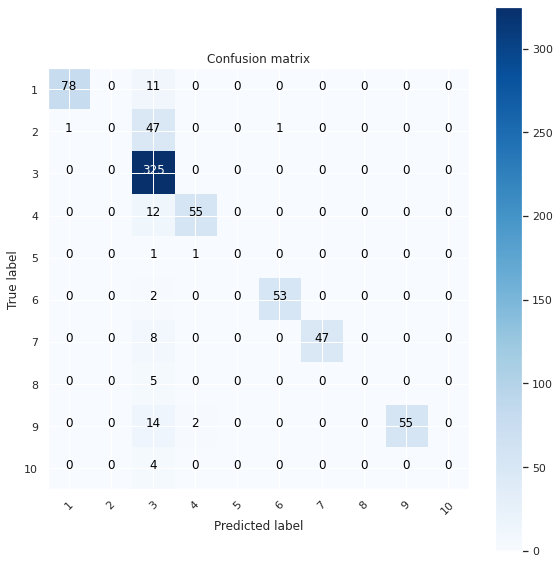

In [ ]:
class_names = [i for i in range(1,11)]
cnf = confusion_matrix(Y_test, svc.predictions)
np.set_printoptions(precision=2)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf, class_names)

In [ ]:
print("The accuracy is : ")
np.diag(cnf).sum()/cnf.sum().sum()*100

The accuracy is : 


84.90304709141274

In [ ]:
# Code from sklearn documentation.
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

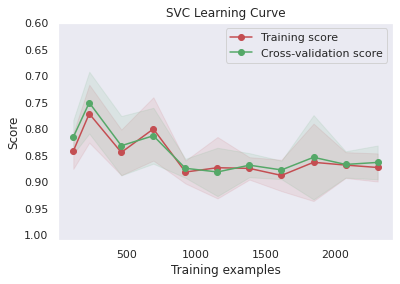

In [ ]:
g = plot_learning_curve(svc.grid.best_estimator_, "SVC Learning Curve", X_train, Y_train, ylim=[1.01, 0.6], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = Class_Fit(clf = LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-1,2,10)}], Kfold = 5)
lr.grid_fit(X_train, Y_train)


In [ ]:
%%capture
lr.grid_predict(X_test, Y_test)

Confusion matrix, without normalization
[[ 87   0   1   0   0   0   1   0   0   0]
 [  0  40   8   1   0   0   0   0   0   0]
 [  1   7 314   0   0   0   2   0   1   0]
 [  0   0   2  65   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0  55   0   0   0   0]
 [  0   0   2   0   0   0  53   0   0   0]
 [  0   1   4   0   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0  69   0]
 [  0   1   0   0   0   0   0   0   0   3]]


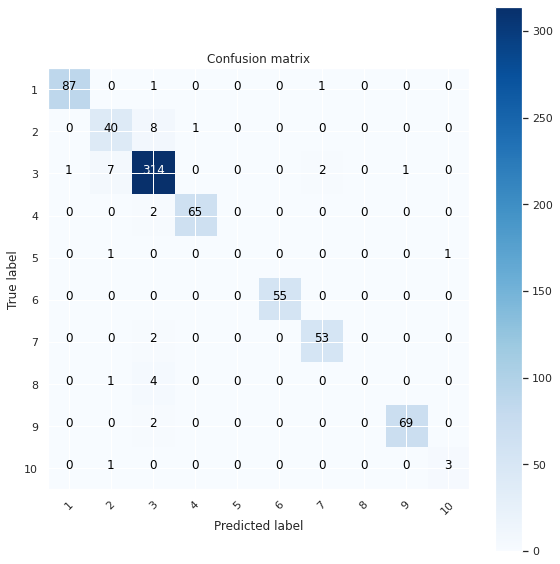

In [ ]:
cnf_lr = confusion_matrix(Y_test, lr.predictions)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_lr, class_names)

In [ ]:
print("The accuracy is : ")
np.diag(cnf_lr).sum()/cnf_lr.sum().sum()*100

The accuracy is : 


95.01385041551247

In [ ]:
g = plot_learning_curve(lr.grid.best_estimator_, "LogisticRegression Learning Curve", X_train, Y_train, ylim=[1.01, 0.6], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

**KNN Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = Class_Fit(clf = KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors':np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X_train, Y_train)


In [ ]:
%%capture
knn.grid_predict(X_test, Y_test)

Confusion matrix, without normalization
[[ 77   0  10   1   0   0   1   0   0   0]
 [  0  37  12   0   0   0   0   0   0   0]
 [ 10  10 297   3   0   0   4   0   1   0]
 [  1   6   8  51   0   0   0   0   1   0]
 [  0   1   0   0   0   0   0   0   0   1]
 [  0   1   9   0   0  45   0   0   0   0]
 [  2   1  14   0   0   0  38   0   0   0]
 [  0   1   4   0   0   0   0   0   0   0]
 [  4   1   9   1   0   0   0   0  56   0]
 [  0   0   0   0   3   0   0   0   0   1]]


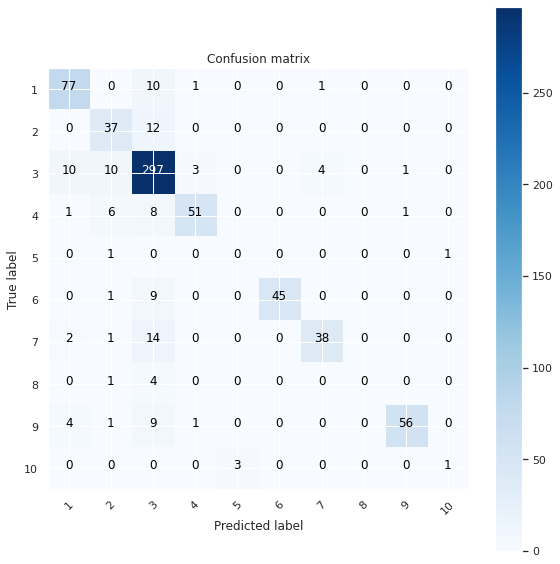

In [ ]:
cnf_knn = confusion_matrix(Y_test, knn.predictions)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_knn, class_names)

In [ ]:
print("The accuracy is : ")
np.diag(cnf_knn).sum()/cnf_knn.sum().sum()*100

The accuracy is : 


83.37950138504155

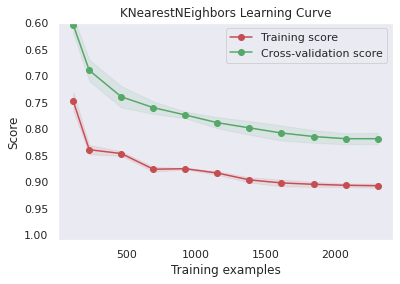

In [ ]:
tg = plot_learning_curve(knn.grid.best_estimator_, "KNearestNEighbors Learning Curve", X_train, Y_train, ylim=[1.01, 0.6], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

**Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tr = Class_Fit(clf = DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion':['entropy', 'gini'], 'max_features':['sqrt', 'log2']}], Kfold = 5)
tr.grid_fit(X_train, Y_train)


In [ ]:
%%capture
tr.grid_predict(X_test, Y_test)

Confusion matrix, without normalization
[[ 86   0   3   0   0   0   0   0   0   0]
 [  1  36   8   0   0   1   2   1   0   0]
 [  7  10 297   0   0   1   2   3   5   0]
 [  2   1   0  62   0   1   1   0   0   0]
 [  0   1   0   0   0   0   0   0   0   1]
 [  0   1   1   0   0  52   0   1   0   0]
 [  0   0   1   0   0   0  54   0   0   0]
 [  0   1   4   0   0   0   0   0   0   0]
 [  0   0   3   3   1   1   0   0  63   0]
 [  0   3   0   0   0   0   0   0   0   1]]


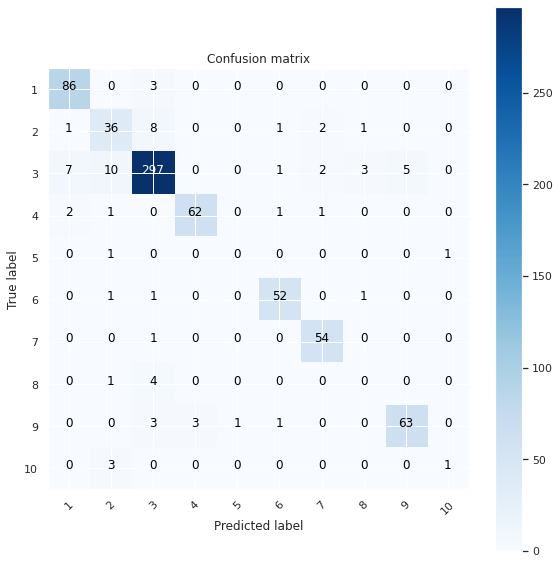

In [ ]:
cnf_dt = confusion_matrix(Y_test, tr.predictions)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_dt, class_names)

In [ ]:
print("The accuracy is : ")
np.diag(cnf).sum()/cnf.sum().sum()*100

The accuracy is : 


93.49030470914127

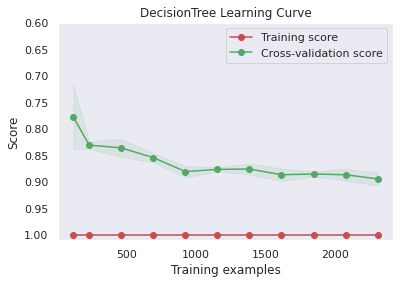

In [ ]:
g = plot_learning_curve(tr.grid.best_estimator_, "DecisionTree Learning Curve", X_train, Y_train, ylim=[1.01, 0.6], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

**Random Forest Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = Class_Fit(clf = RandomForestClassifier)
rf.grid_search(parameters = [{'criterion':['entropy', 'gini'],
                              'max_features':['sqrt', 'log2'], 'n_estimators':[20, 40, 60, 80, 100]}], Kfold = 5)
rf.grid_fit(X_train, Y_train)


In [ ]:
%%capture
rf.grid_predict(X_test, Y_test)

Confusion matrix, without normalization
[[ 86   0   2   0   0   0   0   0   1   0]
 [  1  35   9   1   0   1   2   0   0   0]
 [  5   8 311   0   0   0   1   0   0   0]
 [  1   1   0  64   0   1   0   0   0   0]
 [  0   1   0   1   0   0   0   0   0   0]
 [  0   0   1   0   0  54   0   0   0   0]
 [  0   0   0   0   0   0  55   0   0   0]
 [  0   1   4   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0  69   0]
 [  0   3   0   0   0   0   0   0   0   1]]


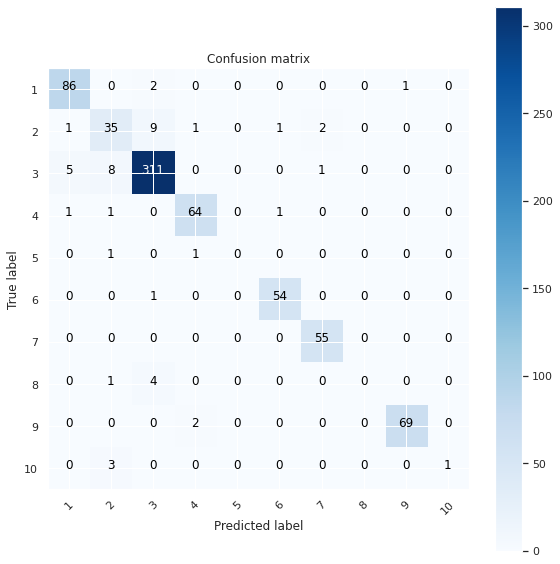

In [ ]:
cnf = confusion_matrix(Y_test, rf.predictions)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf, class_names)

In [ ]:
print("The accuracy is : ")
np.diag(cnf).sum()/cnf.sum().sum()*100

The accuracy is : 


93.49030470914127

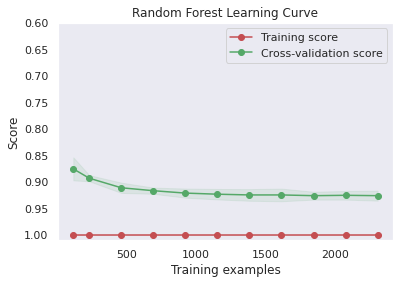

In [ ]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest Learning Curve", X_train, Y_train, ylim=[1.01, 0.6], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

**Gradiant Boosted Decision Tress**

In [ ]:
import xgboost

In [ ]:
%%capture
gbdt = Class_Fit(clf = xgboost.XGBClassifier)
gbdt.grid_search(parameters = [{'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}], Kfold = 5)
gbdt.grid_fit(X_train, Y_train)
gbdt.grid_predict(X_test, Y_test)

Confusion matrix, without normalization
[[ 87   0   1   0   0   0   0   0   1   0]
 [  1  37   8   1   0   0   2   0   0   0]
 [  5   8 311   0   0   0   1   0   0   0]
 [  1   2   0  63   0   1   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0  55   0   0   0   0]
 [  0   0   1   0   0   0  54   0   0   0]
 [  0   1   4   0   0   0   0   0   0   0]
 [  0   0   0   2   0   1   0   0  68   0]
 [  0   0   0   0   1   0   0   0   0   3]]


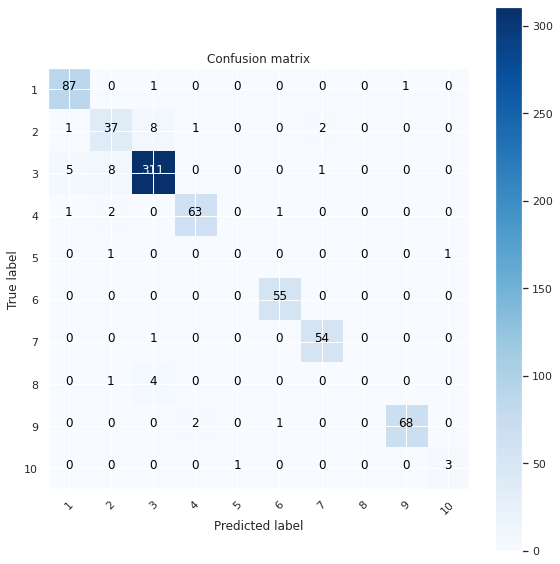

In [ ]:
cnf = confusion_matrix(Y_test, gbdt.predictions)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf, class_names)

In [ ]:
print("The accuracy is : ")
np.diag(cnf).sum()/cnf.sum().sum()*100

The accuracy is : 


93.90581717451524

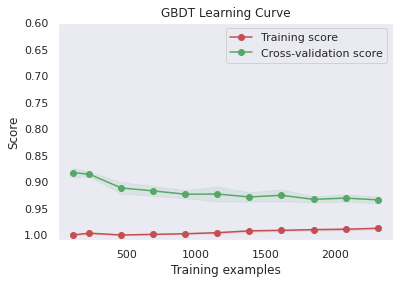

In [ ]:
g = plot_learning_curve(gbdt.grid.best_estimator_, "GBDT Learning Curve", X_train, Y_train, ylim=[1.01, 0.6], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [ ]:
rf_best = RandomForestClassifier(**rf.grid.best_params_)
gbdt_best = xgboost.XGBClassifier(**gbdt.grid.best_params_)
svc_best = LinearSVC(**svc.grid.best_params_)
tr_best = DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = KNeighborsClassifier(**knn.grid.best_params_)
lr_best = LogisticRegression(**lr.grid.best_params_)

**Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
votingC = VotingClassifier(estimators=[('rf', rf_best), ('gb', gbdt_best), ('knn', knn_best), ('lr', lr_best)])

In [ ]:
votingC = votingC.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
predictions = votingC.predict(X_test)

In [ ]:
#print("Precision : {:.2f}%".format(100 * accuracy_score(Y_test, predictions)))

This is the highest precision tha we have obtained

Confusion matrix, without normalization
[[ 87   0   1   0   0   0   0   0   1   0]
 [  1  37   8   1   0   0   2   0   0   0]
 [  5   8 311   0   0   0   1   0   0   0]
 [  1   2   0  63   0   1   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0  55   0   0   0   0]
 [  0   0   1   0   0   0  54   0   0   0]
 [  0   1   4   0   0   0   0   0   0   0]
 [  0   0   0   2   0   1   0   0  68   0]
 [  0   0   0   0   1   0   0   0   0   3]]


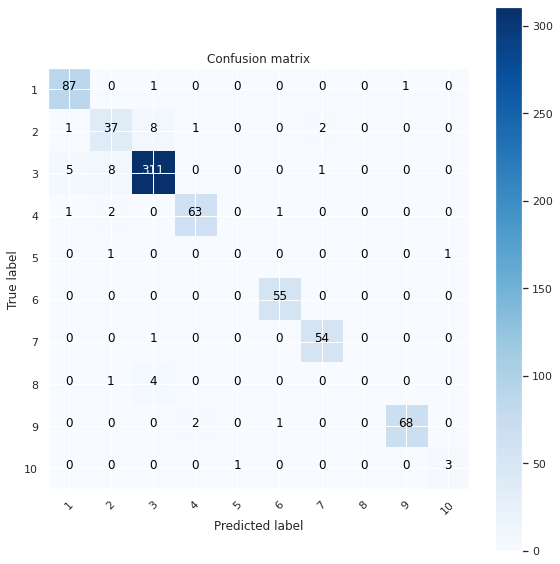

In [ ]:
cnf_xg = confusion_matrix(Y_test, gbdt.predictions)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_xg, class_names)

In [ ]:
print("The accuracy is : ")
np.diag(cnf_xg).sum()/cnf_xg.sum().sum()*100

The accuracy is : 


93.90581717451524

In [ ]:
#Testing the model
basket_price = set_test.copy(deep=True)

In [ ]:
transanctions_per_user = basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count', 'min', 'max', 'mean', 'sum'])

for i in range(5):
    col = 'categ_{}'.format(i)
    transanctions_per_user.loc[:, col] = basket_price.groupby(by=['CustomerID'])[col].sum() / transanctions_per_user['sum'] * 100

transanctions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()

transanctions_per_user['count'] = 5 * transanctions_per_user['count']
transanctions_per_user['sum'] = transanctions_per_user['count'] * transanctions_per_user['mean']

transanctions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347.0,10,224.82,1294.32,759.57,7595.70,12.696657,25.053649,5.634767,32.343299,24.271627
1,12349.0,5,1757.55,1757.55,1757.55,8787.75,4.513101,52.138488,20.389178,12.245455,10.713778
2,12352.0,5,311.73,311.73,311.73,1558.65,6.672441,60.084047,17.290604,8.735123,7.217785
3,12356.0,5,58.35,58.35,58.35,291.75,0.000000,100.000000,0.000000,0.000000,0.000000
4,12357.0,5,6207.67,6207.67,6207.67,31038.35,5.089832,26.686341,25.189000,14.684737,28.350089


In [ ]:
list_cols = ['count', 'min', 'max', 'mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
matrix_test = transanctions_per_user[list_cols].values
scaled_test_matrix = scaler.transform(matrix_test)

In [ ]:
Y = kmeans.predict(scaled_test_matrix)
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = transanctions_per_user[columns]
predictions = votingC.predict(X)

In [ ]:
print("Accuracy : {:.2f}%".format(100 * accuracy_score(Y, predictions)))

Accuracy : 89.62%
